In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
#import scipy as sp
import scipy.stats as sps

# Question 1

## Q1.1 generate data:
(a) $X=\left[-1, -0.99, -0.98, \ldots, 0.98, 0.99, 1\right]$ 
 
(b) $Y = 2\cdot X$
 
(c) write a function noise_var(v) which receives an array and adds **to each element** a sample from a normal distribution with mean 0 and variance 0.01. 

(d) using the function you wrote in clause (c) generate $X'$. Where $X'$ is a vector defined as following:
- for all $x_i\in X, x'_i\in X'$
- $ x'_i=x_i+n_i $ 
- $n_i\sim \mathcal{N}\left(0, 0.01\right)$ 

(d) Repeat the same process as in (d) to create $Y'$

In [19]:
# (a)
X = np.linspace(-1,1,201)

# (b)
Y = 2*X

# (c)
def noise_var(v):
    return [v_i + np.random.normal(0, 0.1) for v_i in v]

# (d)
X_prime = noise_var(X)

# (e)
Y_prime = noise_var(Y)

## Q1.2
Are $X'$ and $Y'$ statistically dependent? what type of dependence? how can you show that? 

1. explain in words
2. show with math (in code)


*hint - most mathematical operations you encounter are already implemented in the Python libraries you know. Use them.*

1. $X$ and $Y$ are linearly dependent by definition ($Y = 2 \cdot X$). Applying some random noise following a centered normal distribution doesn't change the mean of $X'$ and $Y'$, and while the correlation changes, the dependence remains linear.

In [20]:
# (2) Let's take a look at the correlation of the variables
print('Correlation of original sets X and Y: %f' % np.corrcoef(X,Y)[0, 1])
print("Correlation of modified sets X' and Y': %f" % np.corrcoef(Y_prime,X_prime)[0, 1])

Correlation of original sets X and Y: 1.000000
Correlation of modified sets X' and Y': 0.982042


# Question 2


Load the data in movie_rating.csv into a dataframe. The data consists of critic ratings and people votes for a set of 20 movies.
## Q2.1
Compute the linear correlation between critic ratings and people votes


*hint - most mathematical operations you encounter are already implemented in the Python libraries you know. Use them.*

In [34]:
# create the dataframe
df = pd.read_csv('movie_rating.csv')
display(HTML(df.head().to_html()))

print('Correlation of votes with ratings: %f' % np.corrcoef(df['people_vote'],df['rating'])[0, 1])

,Unnamed: 0,people_vote,rating
0,0,60.000000,7.003429
1,1,73.812940,8.102049
2,2,87.096481,8.969485
3,3,70.698214,7.506635
4,4,71.963592,7.366683


Correlation of votes with ratings: 0.336953


## Q2.2
(a) To explore the connection between critic ratings and people votes, draw them against each other in a scatter plot. 

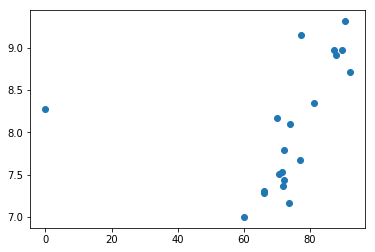

In [53]:
plt.scatter(df['people_vote'],df['rating'])
plt.show()

(b) Create a new data frame, with all the movies, except the one with the lowest people vote. 

In [54]:
df_clean = df.loc[df['people_vote'] != df['people_vote'].min()]
df_clean.head()

,Unnamed: 0,people_vote,rating
0,0,60.000000,7.003429
1,1,73.812940,8.102049
2,2,87.096481,8.969485
3,3,70.698214,7.506635
4,4,71.963592,7.366683


(c) Draw a scatter plot for the movies selected. Is there a linear connection? Explain.

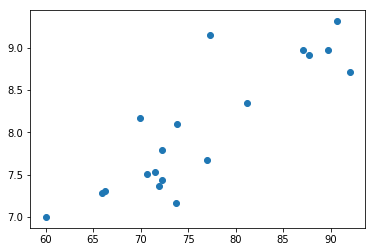

In [55]:
plt.scatter(df_clean['people_vote'],df_clean['rating'])
plt.show()

The rating and people_vote features are clearly linearly correlated but the existence of an outlier brought the Pearson correlation down to 0 previously. After filtering the outlier we expect the correlation to be pretty high. 

(d) Congragulations you've encountered an outlier, a data point so far from the others, keeping it may adversely affect results. 
Linear correlation is sensitive to distance. Handling outliers is important and most cases are harder than this one, due to complexity (hunderds of variables), size (thousands of movies), etc. In this case a possible remedy would be to use order statistics or ranks (1st, 2nd,...).

$$
\small
X=\{100,0, 15, 50\}
\rightarrow
rank(X)=\{4, 1, 2, 3\}
$$

- Create a new data frame for all movies with all critic ratings replaced by their rank and the same for people vote. 
- Draw a scatter plot
- compute the linear correlation.

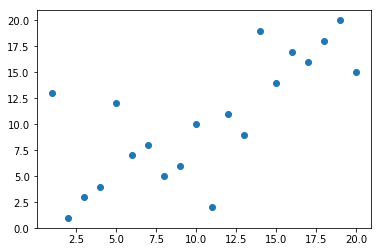

Correlation of votes with ratings: 0.724812


In [70]:
df_ranked = df.rank()
plt.scatter(df_ranked['people_vote'],df_ranked['rating'])
plt.show()

print('Correlation of votes with ratings: %f' % np.corrcoef(df_ranked['people_vote'],df_ranked['rating'])[0, 1])

Correlation over ranks is named Spearman correlation.

# Question 3
Read the csv file bank-full.csv into a data frame. The description
of this data can be found in bank-info.txt

(a) Compute the Spearman correlation between days from last contact and previous campaign contacts

In [74]:
# create the dataframe
df_bank = pd.read_csv('bank-full.csv')
df_bank.head()

,age,job,marital,education,default_credit,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,days_from_last_contact,previous_campaign_contacts,previous_campaign_outcome,outcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [75]:
# Let's read the description
with open('bank-info.txt') as file:
    print(file.read())

﻿   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default_credit: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing_loan: has housing loan? (binary: "yes","no")
   8 - personal_loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan

In [87]:
sps.spearmanr(df_bank['days_from_last_contact'],df_bank['previous_campaign_contacts'])

SpearmanrResult(correlation=0.9856446382444941, pvalue=0.0)

(b) Is there an actual linear correlation between the ranks? Explain, and back your claims with math and plots. 

The spearman correlation is close to 1 which seems to indicate that the ranks are largely correlated.

Is this really so? Let's take a closer look!

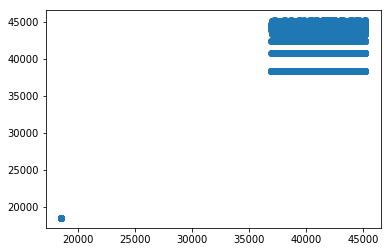

In [84]:
# let's create a new df with ranks
df_bank_r = df_bank[['days_from_last_contact','previous_campaign_contacts']].rank()
plt.scatter(df_bank_r['days_from_last_contact'],df_bank_r['previous_campaign_contacts'])
plt.show()

We notice from this chart that there is a clear outlier that may be messing up the results, let's remove it and plot again

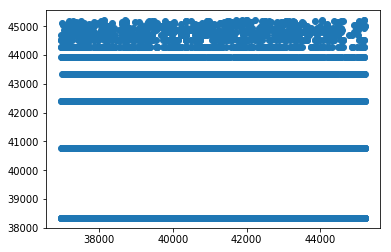

SpearmanrResult(correlation=-0.10127327886194193, pvalue=2.839971779125625e-20)

In [92]:
df_bank_r_clean = df_bank_r.loc[df_bank_r['days_from_last_contact'] != df_bank_r['days_from_last_contact'].min()]

plt.scatter(df_bank_r_clean['days_from_last_contact'],df_bank_r_clean['previous_campaign_contacts'])
plt.show()

sps.spearmanr(df_bank_r_clean['days_from_last_contact'],df_bank_r_clean['previous_campaign_contacts'])

Removing the outlier had a huge impact on the correlation! Going almost from 1 to 0!

Actually, we could have sensed this value would be an issue from the beginning, as the provided set of data is including in the same feature categorical and numerical data.
The clients that were never contacted (previous_campaign_contacts == 0) have a 'dummy' value of days since last contact (days_from_last_contact == -1).

So after filtering these values out, we can see that there is little to no correlation between the ranks.
#### It is remarkable that in the previous question, the presence of an outlier brought the correlation down from 0.7 to 0.3 and in this case, it is the other way: when the outlier is included, the correlation is 0.98 and without it, it is -0.1! In other words, outliers can make our life miserable in various ways